# Blinkit Sales: Exploratory Data Analysis with Python

In [3]:
# importing neccessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### File 1: Blinkit Products

In [4]:
# loading csv into a dataframe
product_df = pd.read_csv('/Users/tovi/Desktop/Projects/Blinket-Sales/blinkit csvs/blinkit_products.csv')
product_df

,product_id,product_name,category,brand,price,mrp,margin_percentage,shelf_life_days,min_stock_level,max_stock_level
0,153019,Onions,Fruits & Vegetables,Aurora LLC,947.95,1263.93,25.0,3,13,88
1,11422,Potatoes,Fruits & Vegetables,Ramaswamy-Tata,127.16,169.55,25.0,3,20,65
2,669378,Potatoes,Fruits & Vegetables,Chadha and Sons,212.14,282.85,25.0,3,23,70
3,848226,Tomatoes,Fruits & Vegetables,Barad and Sons,209.59,279.45,25.0,3,10,51
4,890623,Onions,Fruits & Vegetables,"Sangha, Nagar and Varty",354.52,472.69,25.0,3,27,55
...,...,...,...,...,...,...,...,...,...,...
263,444361,Pain Reliever,Pharmacy,"Prakash, Bawa and Kale",822.63,1028.29,20.0,365,20,71
264,679284,Cough Syrup,Pharmacy,Pant LLC,877.89,1097.36,20.0,365,28,95
265,240179,Cough Syrup,Pharmacy,Ram-Suri,90.56,113.20,20.0,365,20,56
266,673058,Cough Syrup,Pharmacy,Balan-Madan,765.76,957.20,20.0,365,30,94


In [5]:
#checking the shape of df
product_df.shape

(268, 10)

In [6]:
# general descriptive stats
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   product_id         268 non-null    int64  
 1   product_name       268 non-null    object 
 2   category           268 non-null    object 
 3   brand              268 non-null    object 
 4   price              268 non-null    float64
 5   mrp                268 non-null    float64
 6   margin_percentage  268 non-null    float64
 7   shelf_life_days    268 non-null    int64  
 8   min_stock_level    268 non-null    int64  
 9   max_stock_level    268 non-null    int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 21.1+ KB


In [7]:
# checking for duplicates
product_df.duplicated().sum()

0

In [8]:
# checking for null values
null_check = product_df.isnull().sum()
print(null_check)

product_id           0
product_name         0
category             0
brand                0
price                0
mrp                  0
margin_percentage    0
shelf_life_days      0
min_stock_level      0
max_stock_level      0
dtype: int64


In [9]:
# creating new column that converts prices from the Indian Rupee to the US Dollar
exchange_rate = 0.012
product_df['price_usd'] = product_df['price'] * exchange_rate
product_df.head()

,product_id,product_name,category,brand,price,mrp,margin_percentage,shelf_life_days,min_stock_level,max_stock_level,price_usd
0,153019,Onions,Fruits & Vegetables,Aurora LLC,947.95,1263.93,25.0,3,13,88,11.37540
1,11422,Potatoes,Fruits & Vegetables,Ramaswamy-Tata,127.16,169.55,25.0,3,20,65,1.52592
2,669378,Potatoes,Fruits & Vegetables,Chadha and Sons,212.14,282.85,25.0,3,23,70,2.54568
3,848226,Tomatoes,Fruits & Vegetables,Barad and Sons,209.59,279.45,25.0,3,10,51,2.51508
4,890623,Onions,Fruits & Vegetables,"Sangha, Nagar and Varty",354.52,472.69,25.0,3,27,55,4.25424


#### Pricing & Margins

In [10]:
# calculating average price and margin percentage
product_df[['price', 'margin_percentage']].mean()

price                488.356828
margin_percentage     27.779851
dtype: float64

In [11]:
# calculating average price and margin percentage
product_df[['price_usd', 'margin_percentage']].mean()

price_usd             5.860282
margin_percentage    27.779851
dtype: float64

In [12]:
# calcultaing margin percentage variation across categories
product_df.groupby('category')['margin_percentage'].describe()

,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
Baby Care,16.0,30.0,0.0,30.0,30.0,30.0,30.0,30.0
Cold Drinks & Juices,22.0,30.0,0.0,30.0,30.0,30.0,30.0,30.0
Dairy & Breakfast,30.0,20.0,0.0,20.0,20.0,20.0,20.0,20.0
Fruits & Vegetables,27.0,25.0,0.0,25.0,25.0,25.0,25.0,25.0
Grocery & Staples,24.0,15.0,0.0,15.0,15.0,15.0,15.0,15.0
Household Care,27.0,25.0,0.0,25.0,25.0,25.0,25.0,25.0
Instant & Frozen Food,20.0,40.0,0.0,40.0,40.0,40.0,40.0,40.0
Personal Care,25.0,35.0,0.0,35.0,35.0,35.0,35.0,35.0
Pet Care,25.0,35.0,0.0,35.0,35.0,35.0,35.0,35.0


Text(0, 0.5, 'Margin Percentage')

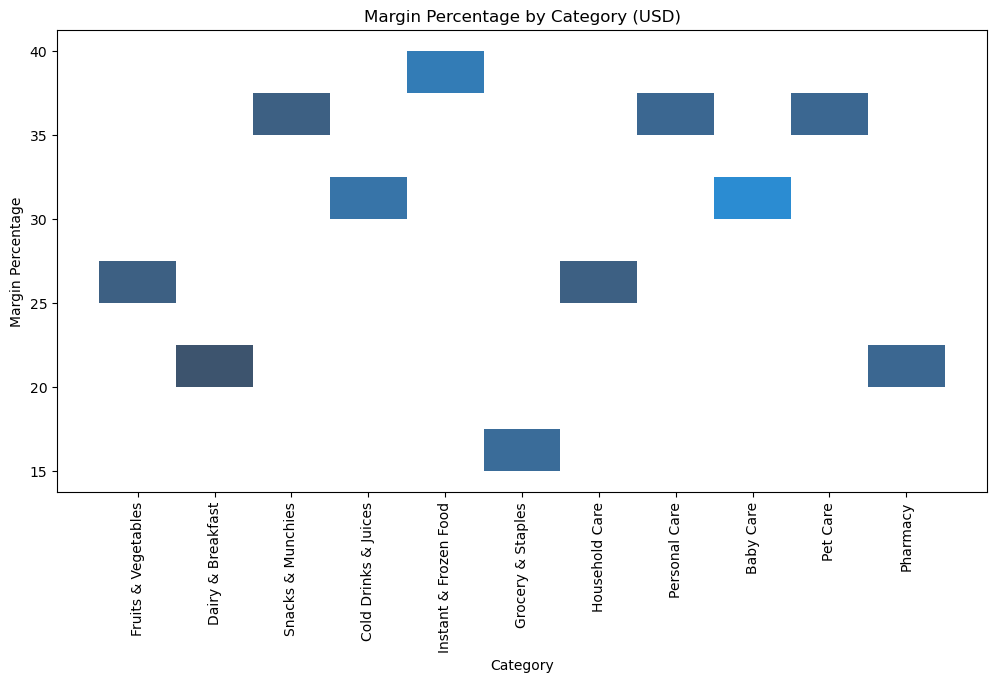

In [102]:
# margin percentage distribution across categories visual
plt.figure(figsize=(12,6))
sns.histplot(data=product_df, x='category', y='margin_percentage')
plt.xticks(rotation=90)
plt.title("Margin Percentage by Category (USD)")
plt.xlabel('Category')
plt.ylabel('Margin Percentage')

In [17]:
# average price of products in each category (USD)
product_df.groupby('category')['price_usd'].mean()

category
Baby Care                6.193830
Cold Drinks & Juices     6.006180
Dairy & Breakfast        6.829156
Fruits & Vegetables      6.558422
Grocery & Staples        4.768290
Household Care           4.838333
Instant & Frozen Food    5.044140
Personal Care            5.299147
Pet Care                 6.563208
Pharmacy                 7.188322
Snacks & Munchies        5.005280
Name: price_usd, dtype: float64

Text(0, 0.5, 'Price ($)')

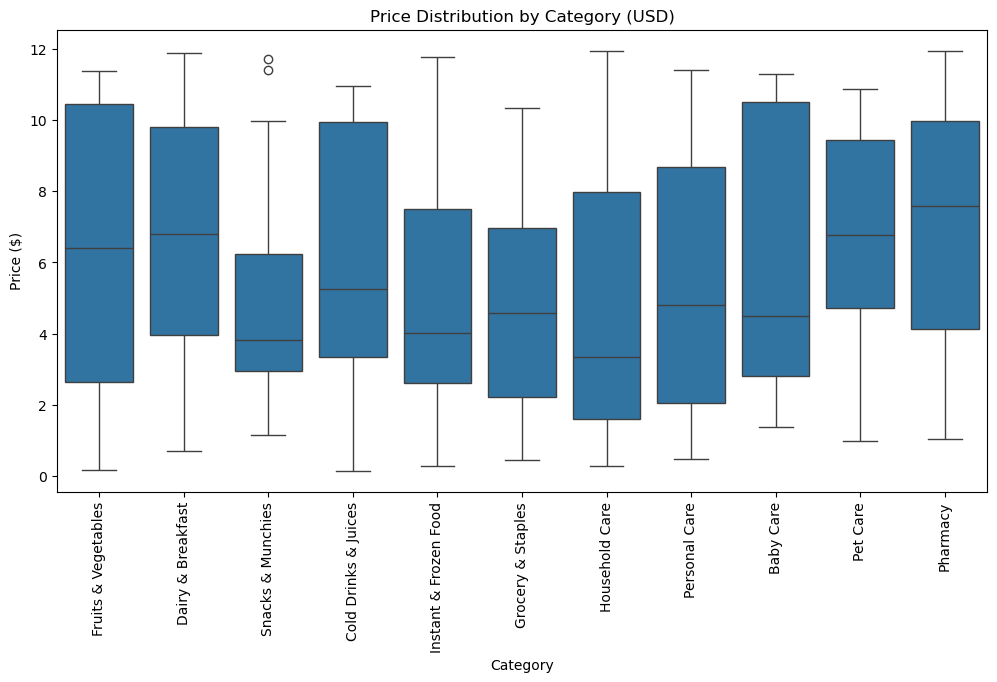

In [101]:
# price distribution across categories visual
plt.figure(figsize=(12,6))
sns.boxplot(data=product_df, x='category', y='price_usd')
plt.xticks(rotation=90)
plt.title("Price Distribution by Category (USD)")
plt.xlabel('Category')
plt.ylabel('Price ($)')

In [22]:
# products with highest and lowest markup, mrp is in Rupees here, so I will use the non-converted prices to calculate markup
product_df['markup'] = product_df['mrp'] - product_df['price']
highest_markup = product_df.loc[product_df['markup'].idxmax()]
lowest_markup = product_df.loc[product_df['markup'].idxmin()]
print(f'The product with the highest markup is: {highest_markup}')
print(f'The product with the lowest markup is: {lowest_markup}')

The product with the highest markup is: product_id                          305754
product_name             Frozen Vegetables
category             Instant & Frozen Food
brand                         Mammen-Hegde
price                               979.99
mrp                                1633.32
margin_percentage                     40.0
shelf_life_days                        180
min_stock_level                         22
max_stock_level                         81
price_usd                         11.75988
markup                              653.33
Name: 110, dtype: object
The product with the lowest markup is: product_id                        654297
product_name                    Potatoes
category             Fruits & Vegetables
brand                      Chandran-Dass
price                              13.25
mrp                                17.67
margin_percentage                   25.0
shelf_life_days                        3
min_stock_level                       20
max_stock_l

#### Stock & Inventory

In [23]:
# category with the most products
max_prod = product_df['category'].value_counts().idxmax()
print (f'The category with the most amount of products is {max_prod}.')

The category with the most amount of products is Dairy & Breakfast.


In [24]:
# category with the least products
min_prod = product_df['category'].value_counts().idxmin()
print (f'The category with the least amount of products is {min_prod}.')

The category with the least amount of products is Baby Care.


### File 2: Blinkit Deliveries

In [25]:
# loading csv into a dataframe
delivery_df = pd.read_csv('/Users/tovi/Desktop/Projects/Blinket-Sales/blinkit csvs/blinkit_orders.csv')
delivery_df

,order_id,customer_id,order_date,promised_delivery_time,actual_delivery_time,delivery_status,order_total,payment_method,delivery_partner_id,store_id
0,1961864118,30065862,2024-07-17 08:34:01,2024-07-17 08:52:01,2024-07-17 08:47:01,On Time,3197.07,Cash,63230,4771
1,1549769649,9573071,2024-05-28 13:14:29,2024-05-28 13:25:29,2024-05-28 13:27:29,On Time,976.55,Cash,14983,7534
2,9185164487,45477575,2024-09-23 13:07:12,2024-09-23 13:25:12,2024-09-23 13:29:12,On Time,839.05,UPI,39859,9886
3,9644738826,88067569,2023-11-24 16:16:56,2023-11-24 16:34:56,2023-11-24 16:33:56,On Time,440.23,Card,61497,7917
4,5427684290,83298567,2023-11-20 05:00:39,2023-11-20 05:17:39,2023-11-20 05:18:39,On Time,2526.68,Cash,84315,2741
...,...,...,...,...,...,...,...,...,...,...
4995,1669690997,62600289,2023-12-25 15:46:20,2023-12-25 16:05:20,2023-12-25 16:10:20,On Time,1132.33,Cash,90914,1587
4996,8340761903,53640286,2023-11-27 09:18:43,2023-11-27 09:38:43,2023-11-27 09:36:43,On Time,2372.01,Cash,27952,3458
4997,5936301790,87059497,2024-06-21 19:09:09,2024-06-21 19:23:09,2024-06-21 19:26:09,On Time,3158.35,Cash,9590,7424
4998,5710579377,67310893,2024-06-06 14:58:13,2024-06-06 15:12:13,2024-06-06 15:10:13,On Time,1918.92,UPI,29940,6128


In [26]:
#checking shape
delivery_df.shape

(5000, 10)

In [27]:
# general descriptive stats
delivery_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   order_id                5000 non-null   int64  
 1   customer_id             5000 non-null   int64  
 2   order_date              5000 non-null   object 
 3   promised_delivery_time  5000 non-null   object 
 4   actual_delivery_time    5000 non-null   object 
 5   delivery_status         5000 non-null   object 
 6   order_total             5000 non-null   float64
 7   payment_method          5000 non-null   object 
 8   delivery_partner_id     5000 non-null   int64  
 9   store_id                5000 non-null   int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 390.8+ KB


#### Data Cleaning

In [28]:
# checking for duplicates
delivery_df.duplicated().sum()

0

In [29]:
# checking for null values
null_check = delivery_df.isnull().sum()
print(null_check)

order_id                  0
customer_id               0
order_date                0
promised_delivery_time    0
actual_delivery_time      0
delivery_status           0
order_total               0
payment_method            0
delivery_partner_id       0
store_id                  0
dtype: int64


In [30]:
# converting delivery times to datetime format
delivery_df['order_date'] = pd.to_datetime(delivery_df['order_date'])
delivery_df['promised_delivery_time'] = pd.to_datetime(delivery_df['promised_delivery_time'])
delivery_df['actual_delivery_time'] = pd.to_datetime(delivery_df['actual_delivery_time'])

# creating column of delivery delay times and calculating delays in minutes
delivery_df['delivery_delay'] = (delivery_df['actual_delivery_time'] - delivery_df['promised_delivery_time']).dt.total_seconds() / 60

delivery_df.head()

,order_id,customer_id,order_date,promised_delivery_time,actual_delivery_time,delivery_status,order_total,payment_method,delivery_partner_id,store_id,delivery_delay
0,1961864118,30065862,2024-07-17 08:34:01,2024-07-17 08:52:01,2024-07-17 08:47:01,On Time,3197.07,Cash,63230,4771,-5.0
1,1549769649,9573071,2024-05-28 13:14:29,2024-05-28 13:25:29,2024-05-28 13:27:29,On Time,976.55,Cash,14983,7534,2.0
2,9185164487,45477575,2024-09-23 13:07:12,2024-09-23 13:25:12,2024-09-23 13:29:12,On Time,839.05,UPI,39859,9886,4.0
3,9644738826,88067569,2023-11-24 16:16:56,2023-11-24 16:34:56,2023-11-24 16:33:56,On Time,440.23,Card,61497,7917,-1.0
4,5427684290,83298567,2023-11-20 05:00:39,2023-11-20 05:17:39,2023-11-20 05:18:39,On Time,2526.68,Cash,84315,2741,1.0


In [31]:
# creating new column that converts order_total from Rupees to USD
delivery_df['order_total_usd'] = delivery_df['order_total'] * exchange_rate
delivery_df.head()

,order_id,customer_id,order_date,promised_delivery_time,actual_delivery_time,delivery_status,order_total,payment_method,delivery_partner_id,store_id,delivery_delay,order_total_usd
0,1961864118,30065862,2024-07-17 08:34:01,2024-07-17 08:52:01,2024-07-17 08:47:01,On Time,3197.07,Cash,63230,4771,-5.0,38.36484
1,1549769649,9573071,2024-05-28 13:14:29,2024-05-28 13:25:29,2024-05-28 13:27:29,On Time,976.55,Cash,14983,7534,2.0,11.71860
2,9185164487,45477575,2024-09-23 13:07:12,2024-09-23 13:25:12,2024-09-23 13:29:12,On Time,839.05,UPI,39859,9886,4.0,10.06860
3,9644738826,88067569,2023-11-24 16:16:56,2023-11-24 16:34:56,2023-11-24 16:33:56,On Time,440.23,Card,61497,7917,-1.0,5.28276
4,5427684290,83298567,2023-11-20 05:00:39,2023-11-20 05:17:39,2023-11-20 05:18:39,On Time,2526.68,Cash,84315,2741,1.0,30.32016


#### Delivery Times & Delays

In [33]:
# calculating how often deliveries are late
late_deliveries = (delivery_df['delivery_delay'] > 0).mean() * 100
print(f"Late deliveries: {late_deliveries:.2f}%")

Late deliveries: 61.96%


In [34]:
# calculating average delivery time for all orders
average_delivery_time = delivery_df['delivery_delay'].mean()
print(f"Average delivery time for all orders: {average_delivery_time:.2f} minutes")

Average delivery time for all orders: 4.44 minutes


In [35]:
# calculating average delivery time for on-time orders
on_time_deliveries = delivery_df[delivery_df['delivery_delay'] <= 0]
avg_on_time = on_time_deliveries['delivery_delay'].mean()

#convert negative value to positive value (numbers less than 0 represent early deliveries in the delivery_delay column)
avg_on_time = avg_on_time * -1
print(f"The average delivery time for on-time orders is: {avg_on_time:.2f} minutes")

The average delivery time for on-time orders is: 2.47 minutes


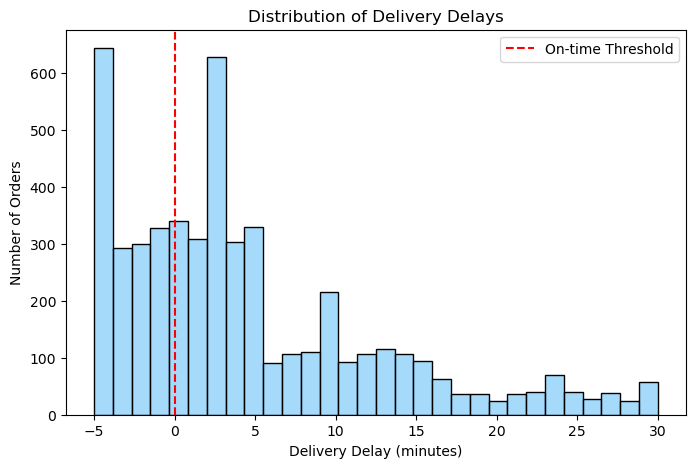

In [100]:
# creating visual of delivery time distribution
plt.figure(figsize=(8,5))
sns.histplot(delivery_df['delivery_delay'], bins=30, color='lightskyblue')
plt.axvline(0, color='red', linestyle='dashed', label='On-time Threshold')
plt.xlabel("Delivery Delay (minutes)")
plt.ylabel("Number of Orders")
plt.title("Distribution of Delivery Delays")
plt.legend()

Correlation between order total and delivery delay: -0.00


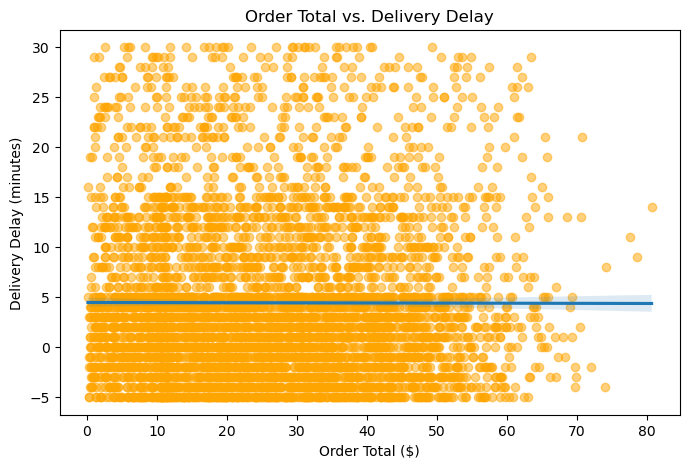

In [99]:
# scatter plot with regression line to explore possible correlation between order total and delay times
plt.figure(figsize=(8,5))
sns.regplot(x=delivery_df['order_total_usd'], y=delivery_df['delivery_delay'], scatter_kws={'alpha':0.5, 'color':'orange'})
plt.xlabel("Order Total ($)")
plt.ylabel("Delivery Delay (minutes)")
plt.title("Order Total vs. Delivery Delay")

# Correlation coefficient
correlation = delivery_df[['order_total_usd', 'delivery_delay']].corr().iloc[0,1]
print(f"Correlation between order total and delivery delay: {correlation:.2f}")

In [236]:
# calculating rate of on-time deliveries for all stores
store_punctuality = delivery_df.groupby('store_id')['delivery_delay'].apply(lambda x: (x <= 0).mean()).sort_values(ascending=False)
print(store_punctuality)

store_id
1       1.0
5172    1.0
5116    1.0
5119    1.0
5121    1.0
       ... 
5323    0.0
5324    0.0
5325    0.0
5326    0.0
9995    0.0
Name: delivery_delay, Length: 5000, dtype: float64


In [43]:
# calculating rate of late deliveries for all stores
store_punctuality = delivery_df.groupby('store_id')['delivery_delay'].apply(lambda x: (x > 0).mean()).sort_values(ascending=False)
print(store_punctuality)

store_id
9995    1.0
4826    1.0
4635    1.0
4638    1.0
4639    1.0
       ... 
4864    0.0
4867    0.0
4870    0.0
4877    0.0
4988    0.0
Name: delivery_delay, Length: 5000, dtype: float64


In [44]:
# counting late deliveries per partner and sorting to view partners with the most late deliveries
late_per_partner = delivery_df[delivery_df['delivery_delay'] > 0].groupby('delivery_partner_id').size().sort_values(ascending=False)
print(late_per_partner)

delivery_partner_id
43       1
65328    1
66248    1
66274    1
66328    1
        ..
34338    1
34344    1
34392    1
34427    1
99968    1
Length: 3098, dtype: int64


In [45]:
# variation in number of late deliveries by partners
late_per_partner.nunique()

1

In [47]:
# calculating average order total for each customer
customer_avg_order = delivery_df.groupby('customer_id')['order_total_usd'].mean()
print(customer_avg_order.describe())

count    2172.000000
mean       26.312350
std        11.986413
min         0.265680
25%        17.921440
50%        26.115380
75%        33.591955
max        73.937760
Name: order_total_usd, dtype: float64


Text(0.5, 1.0, 'Distribution of Average Order Total by Customer')

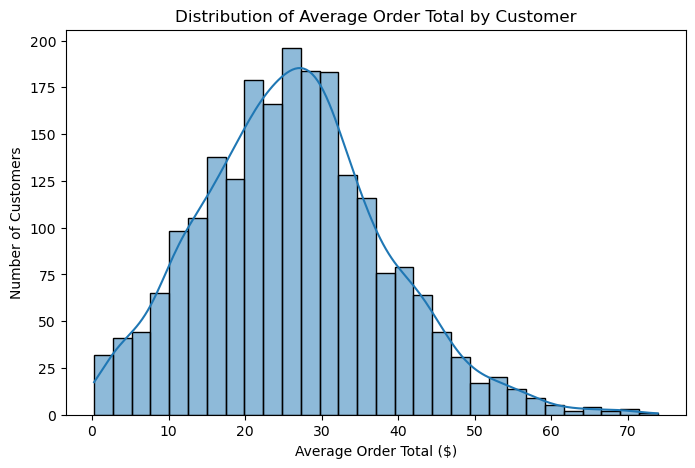

In [98]:
# creating visual of average order total by customer
plt.figure(figsize=(8,5))
sns.histplot(customer_avg_order, bins=30, kde=True)
plt.xlabel("Average Order Total ($)")
plt.ylabel("Number of Customers")
plt.title("Distribution of Average Order Total by Customer")

In [53]:
# calculating the average number or orders placed by each customer
avg_customer_orders = delivery_df['customer_id'].value_counts().mean()
print(f'Customers place an average of {avg_customer_orders:.2f} orders')

Customers place an average of 2.30 orders


In [54]:
# calculating which customers have placed the most orders
customer_orders = delivery_df['customer_id'].value_counts().head(40)
print(customer_orders)

customer_id
77869660    9
8791577     8
17805991    8
13604883    7
93018527    7
26285589    7
21701991    7
75213636    7
10562528    7
25128143    7
12832151    7
20163931    6
31940833    6
47625855    6
92404798    6
80571942    6
11478478    6
4597433     6
80517784    6
67708491    6
20148223    6
65514005    6
41640262    6
93924203    6
84824280    6
44410149    6
61618079    6
30823988    6
98444183    6
93563435    6
61753272    6
46623192    6
22210238    6
90448312    6
9274874     6
57291761    6
54923640    6
20956158    6
38420886    6
28663279    5
Name: count, dtype: int64


In [76]:
# calculating frequncy of each payment method used
payment_counts = delivery_df['payment_method'].value_counts()

print(payment_counts)

payment_method
Card      1285
Cash      1257
Wallet    1244
UPI       1214
Name: count, dtype: int64


/var/folders/yz/1gr6swr5703b66sbw24282z40000gn/T/ipykernel_67817/528739817.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_counts.index, y=payment_counts.values, palette='mako')


Text(0.5, 1.0, 'Order Frequency by Payment Method')

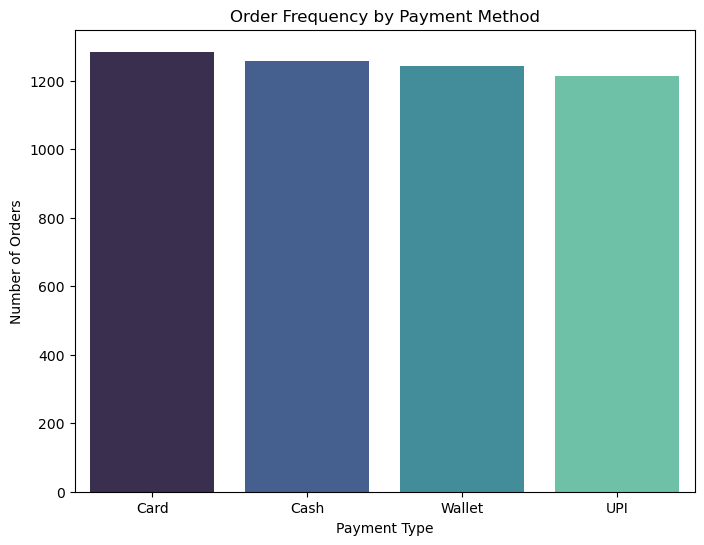

In [77]:
# visual for order frequency across payment methods
plt.figure(figsize=(8,6))
sns.barplot(x=payment_counts.index, y=payment_counts.values, palette='mako')
plt.xlabel('Payment Type')
plt.ylabel('Number of Orders')
plt.title('Order Frequency by Payment Method')

Text(0.5, 1.0, 'Distribution of Order Totals Across Payment Methods')

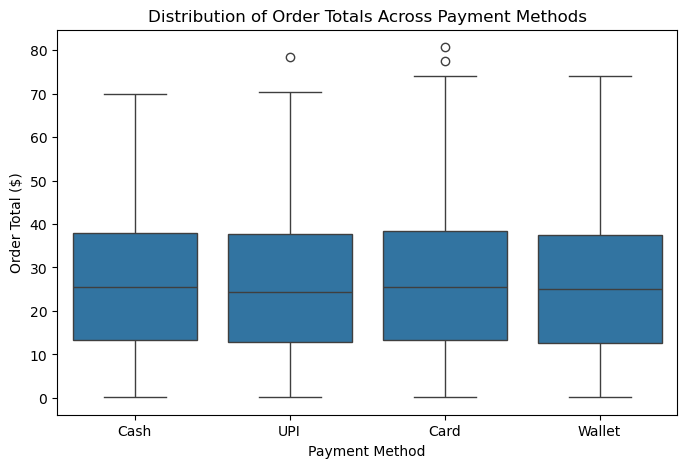

In [97]:
# creating visual to compare order totals across payment methods
plt.figure(figsize=(8,5))
sns.boxplot(x='payment_method', y='order_total_usd', data=delivery_df)
plt.xlabel("Payment Method")
plt.ylabel("Order Total ($)")
plt.title("Distribution of Order Totals Across Payment Methods")

In [79]:
# which stores have recieved the most amount of orders
store_order_counts = delivery_df['store_id'].value_counts().sort_values(ascending=False)
print(store_order_counts)

store_id
4771    1
2463    1
2741    1
3442    1
1318    1
       ..
3458    1
7424    1
6128    1
3078    1
5588    1
Name: count, Length: 5000, dtype: int64


In [264]:
# which partners have delivered the most orders
partner_order_counts = delivery_df['delivery_partner_id'].value_counts()
print(partner_order_counts)

delivery_partner_id
63230    1
53453    1
67163    1
81625    1
48217    1
        ..
13251    1
24901    1
75375    1
63631    1
32851    1
Name: count, Length: 5000, dtype: int64


In [266]:
# no variation in number of deliveries per partner
partner_order_counts.nunique()

1

In [268]:
# calculating average delivery delay by store
store_avg_delay = delivery_df.groupby('store_id')['delivery_delay'].mean() #get average delay for all stores
print(store_avg_delay.describe())

count    5000.000000
mean        4.443000
std         8.063929
min        -5.000000
25%        -1.000000
50%         2.000000
75%         8.000000
max        30.000000
Name: delivery_delay, dtype: float64


In [270]:
# no variation in delivery delay per store as each store only has one order assigned to it
delivery_df['store_id'].nunique()

5000

### File 3: Blinket Units

In [81]:
units_df = pd.read_csv('/Users/tovi/Desktop/Projects/Blinket-Sales/blinkit csvs/blinkit_order_items.csv')
units_df

,order_id,product_id,quantity,unit_price
0,1961864118,642612,3,517.03
1,1549769649,378676,1,881.42
2,9185164487,741341,2,923.84
3,9644738826,561860,1,874.78
4,5427684290,602241,2,976.55
...,...,...,...,...
4995,1669690997,925482,3,475.04
4996,8340761903,124290,2,39.65
4997,5936301790,491314,3,973.44
4998,5710579377,319388,2,657.80


In [82]:
units_df.describe()

,order_id,product_id,quantity,unit_price
count,5.000000e+03,5000.000000,5000.000000,5000.000000
mean,5.029129e+09,509974.939600,2.006800,493.157900
std,2.863533e+09,293678.307475,0.820542,298.075647
min,6.046500e+04,4452.000000,1.000000,12.320000
25%,2.531421e+09,257719.000000,1.000000,227.220000
50%,5.074378e+09,540618.000000,2.000000,448.160000
75%,7.488579e+09,747801.000000,3.000000,781.080000
max,9.998298e+09,993331.000000,3.000000,995.980000


In [83]:
units_df.shape

(5000, 4)

In [84]:
units_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   order_id    5000 non-null   int64  
 1   product_id  5000 non-null   int64  
 2   quantity    5000 non-null   int64  
 3   unit_price  5000 non-null   float64
dtypes: float64(1), int64(3)
memory usage: 156.4 KB


In [85]:
# checking for duplicates
units_df.duplicated().sum()

0

In [86]:
# checking for null values
null_check = units_df.isnull().sum()
print(null_check)

order_id      0
product_id    0
quantity      0
unit_price    0
dtype: int64


In [87]:
# creating new column that holds total order value
units_df['total_price'] = units_df['quantity'] * units_df['unit_price']
print(units_df.head())  # Display the first few rows to confirm the new column


     order_id  product_id  quantity  unit_price  total_price
0  1961864118      642612         3      517.03      1551.09
1  1549769649      378676         1      881.42       881.42
2  9185164487      741341         2      923.84      1847.68
3  9644738826      561860         1      874.78       874.78
4  5427684290      602241         2      976.55      1953.10


In [88]:
# creating new columns to hold unit price and total price in USD
units_df['unit_price_usd']= units_df['unit_price'] * exchange_rate
units_df['total_price_usd'] = units_df['unit_price_usd'] * units_df['quantity']

units_df.head()

,order_id,product_id,quantity,unit_price,total_price,unit_price_usd,total_price_usd
0,1961864118,642612,3,517.03,1551.09,6.20436,18.61308
1,1549769649,378676,1,881.42,881.42,10.57704,10.57704
2,9185164487,741341,2,923.84,1847.68,11.08608,22.17216
3,9644738826,561860,1,874.78,874.78,10.49736,10.49736
4,5427684290,602241,2,976.55,1953.10,11.71860,23.43720


#### Orders & Products

In [89]:
# calculating most frequently ordered products
top_products = units_df.groupby('product_id')['quantity'].sum().sort_values(ascending=False).head(10)
print(top_products)

product_id
51036     70
820973    68
604184    62
34186     61
992178    60
880510    58
673058    56
89084     56
557908    55
123983    55
Name: quantity, dtype: int64


/var/folders/yz/1gr6swr5703b66sbw24282z40000gn/T/ipykernel_67817/2641944024.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.index, y=top_products.values, palette="viridis", order=top_products.index)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, '51036'),
  Text(1, 0, '820973'),
  Text(2, 0, '604184'),
  Text(3, 0, '34186'),
  Text(4, 0, '992178'),
  Text(5, 0, '880510'),
  Text(6, 0, '673058'),
  Text(7, 0, '89084'),
  Text(8, 0, '557908'),
  Text(9, 0, '123983')])

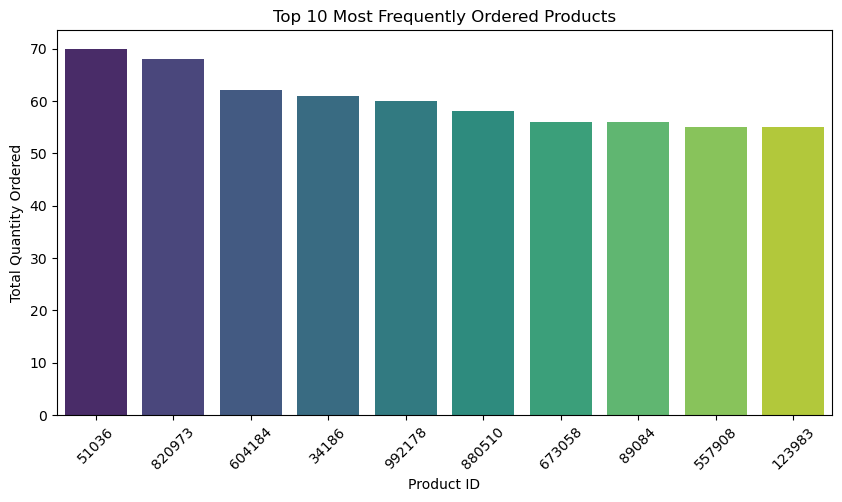

In [96]:
# creating visual for most ordered products
top_products = top_products.sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_products.index, y=top_products.values, palette="viridis", order=top_products.index)

plt.xlabel("Product ID")
plt.ylabel("Total Quantity Ordered")
plt.title("Top 10 Most Frequently Ordered Products")
plt.xticks(rotation=45)

In [92]:
# calulating average order value (USD)
order_totals = units_df.groupby('order_id')['total_price_usd'].sum()
average_order_value = order_totals.mean()
print(f"Average Order Value: ${average_order_value:.2f}")

Average Order Value: $11.93


Text(0.5, 1.0, 'Distribution of Order Sizes')

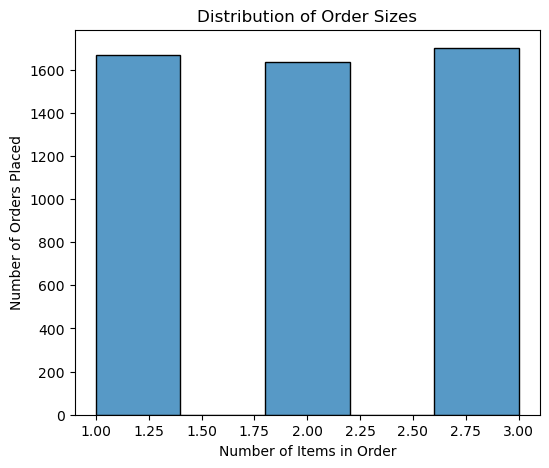

In [106]:
# creating visual for distribution of order values
order_sizes = units_df.groupby('order_id')['quantity'].sum()

plt.figure(figsize=(6,5))
sns.histplot(order_sizes, bins=5)
plt.xlabel("Number of Items in Order")
plt.ylabel("Number of Orders Placed")
plt.title("Distribution of Order Sizes")

In [303]:
# order size general stats
print(order_sizes.describe())

count    5000.000000
mean        2.006800
std         0.820542
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         3.000000
Name: quantity, dtype: float64


In [107]:
# product generating the most revenue
product_revenue = units_df.groupby('product_id')['total_price_usd'].sum()

max_revenue_prod = product_revenue.idxmax()
max_revenue = max_revenue_prod.max()
print(f'The product ID that generated the most revenue is: {max_revenue}.')

The product ID that generated the most revenue is: 51036.


In [108]:
# top 10 products generating the most revenue
max_product_revenue = units_df.groupby('product_id')['total_price_usd'].sum().sort_values(ascending=False)

print(max_product_revenue.head(10))

product_id
51036     782.55240
34186     677.57580
880510    662.19528
557908    621.96420
264803    621.49152
739534    584.80128
18035     558.10944
883013    546.41376
349294    538.41600
112390    526.78800
Name: total_price_usd, dtype: float64


/var/folders/yz/1gr6swr5703b66sbw24282z40000gn/T/ipykernel_67817/3453733306.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_products.index, y=top_10_products.values, palette='viridis', order=top_10_products.index)


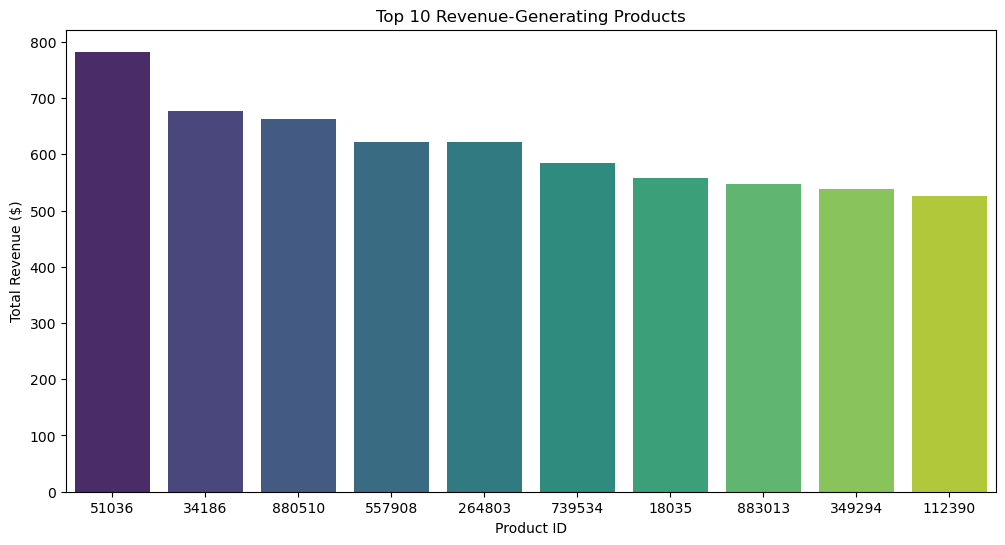

In [110]:
# visual for top 10 products generating the most revenue
top_10_products = max_product_revenue.nlargest(10)
top_10_products = top_10_products.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_products.index, y=top_10_products.values, palette='viridis', order=top_10_products.index)

plt.xlabel('Product ID')
plt.ylabel('Total Revenue ($)')
plt.title('Top 10 Revenue-Generating Products')

In [111]:
# product generating the least revenue
min_revenue_prod = product_revenue.idxmin()
min_revenue = min_revenue_prod.min()
print(f'The product ID that generated the least revenue is: {min_revenue}.')

The product ID that generated the least revenue is: 118820.


In [112]:
# top 10 products generating the least revenue
min_product_revenue = units_df.groupby('product_id')['total_price_usd'].sum().sort_values()
print(min_product_revenue.head(10))

product_id
118820     4.43520
654297     5.72400
962054     6.06960
652118     8.99232
767398     9.03312
300159    11.17620
709916    13.77408
133542    13.97196
473647    15.49800
968887    19.04760
Name: total_price_usd, dtype: float64


/var/folders/yz/1gr6swr5703b66sbw24282z40000gn/T/ipykernel_67817/3140536586.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bottom_10_products.index, y=bottom_10_products.values, palette='viridis', order=bottom_10_products.index)


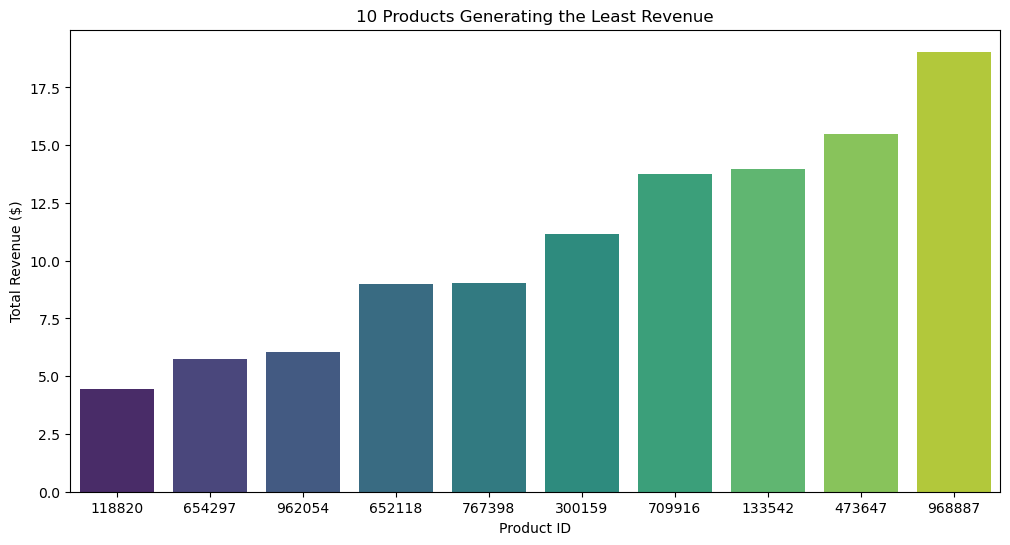

In [113]:
# visual for top 10 products generating the least revenue
bottom_10_products = min_product_revenue.nsmallest(10)
bottom_10_products = bottom_10_products.sort_values()

plt.figure(figsize=(12, 6))
sns.barplot(x=bottom_10_products.index, y=bottom_10_products.values, palette='viridis', order=bottom_10_products.index)

plt.xlabel('Product ID')
plt.ylabel('Total Revenue ($)')
plt.title('10 Products Generating the Least Revenue')

In [114]:
# price distribution general stats
units_df['unit_price_usd'].describe()

count    5000.000000
mean        5.917895
std         3.576908
min         0.147840
25%         2.726640
50%         5.377920
75%         9.372960
max        11.951760
Name: unit_price_usd, dtype: float64

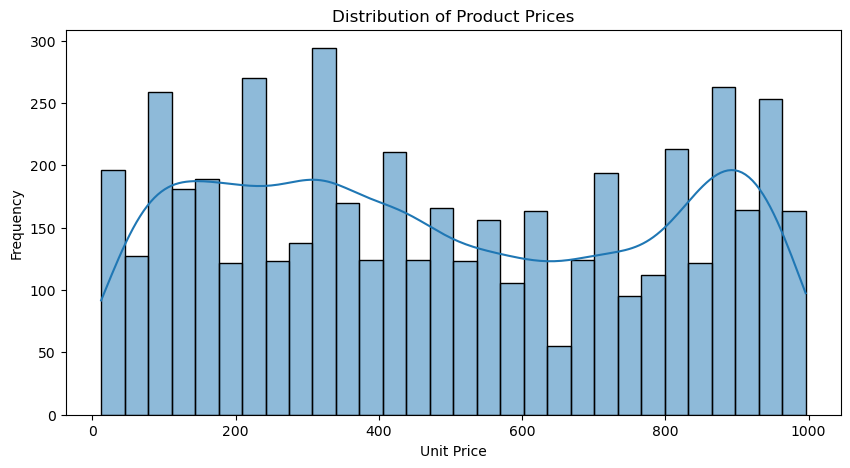

In [115]:
# creating visual for product pricing distrubution
plt.figure(figsize=(10,5))
sns.histplot(units_df['unit_price'], bins=30, kde=True)
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.title('Distribution of Product Prices')


### File 4: Blinkit Marketing Performance

In [116]:
mkt_df = pd.read_csv('/Users/tovi/Desktop/Projects/Blinket-Sales/blinkit csvs/blinkit_marketing_performance.csv')
mkt_df

,campaign_id,campaign_name,date,target_audience,channel,impressions,clicks,conversions,spend,revenue_generated,roas
0,548299,New User Discount,2024-11-05,Premium,App,3130,163,78,1431.85,4777.75,3.60
1,390914,Weekend Special,2024-11-05,Inactive,App,3925,494,45,4506.34,6238.11,2.98
2,834385,Festival Offer,2024-11-05,Inactive,Email,7012,370,78,4524.23,2621.00,2.95
3,241523,Flash Sale,2024-11-05,Inactive,SMS,1115,579,86,3622.79,2955.00,2.84
4,595111,Membership Drive,2024-11-05,New Users,Email,7172,795,54,2888.99,8951.81,2.22
...,...,...,...,...,...,...,...,...,...,...,...
5395,381623,Membership Drive,2023-03-17,New Users,Email,8331,809,92,2363.07,3710.79,1.64
5396,493317,Category Promotion,2023-03-17,Premium,Social Media,5216,860,34,3922.53,7701.25,2.01
5397,879292,App Push Notification,2023-03-17,All,App,8480,734,20,1990.75,6650.41,3.98
5398,461129,Email Campaign,2023-03-17,New Users,Email,3569,568,10,4246.47,5880.42,2.50


#### Data Cleaning

In [117]:
mkt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5400 entries, 0 to 5399
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   campaign_id        5400 non-null   int64  
 1   campaign_name      5400 non-null   object 
 2   date               5400 non-null   object 
 3   target_audience    5400 non-null   object 
 4   channel            5400 non-null   object 
 5   impressions        5400 non-null   int64  
 6   clicks             5400 non-null   int64  
 7   conversions        5400 non-null   int64  
 8   spend              5400 non-null   float64
 9   revenue_generated  5400 non-null   float64
 10  roas               5400 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 464.2+ KB


In [118]:
mkt_df.shape

(5400, 11)

In [120]:
mkt_df.isnull().sum()

campaign_id          0
campaign_name        0
date                 0
target_audience      0
channel              0
impressions          0
clicks               0
conversions          0
spend                0
revenue_generated    0
roas                 0
dtype: int64

In [121]:
mkt_df.duplicated().sum()

0

In [122]:
# creating new column to contain converted spend amounts
mkt_df['spend_usd'] = mkt_df['spend'] * exchange_rate
mkt_df['revenue_generated_usd'] = mkt_df['revenue_generated'] * exchange_rate
mkt_df.head()

,campaign_id,campaign_name,date,target_audience,channel,impressions,clicks,conversions,spend,revenue_generated,roas,spend_usd,revenue_generated_usd
0,548299,New User Discount,2024-11-05,Premium,App,3130,163,78,1431.85,4777.75,3.60,17.18220,57.33300
1,390914,Weekend Special,2024-11-05,Inactive,App,3925,494,45,4506.34,6238.11,2.98,54.07608,74.85732
2,834385,Festival Offer,2024-11-05,Inactive,Email,7012,370,78,4524.23,2621.00,2.95,54.29076,31.45200
3,241523,Flash Sale,2024-11-05,Inactive,SMS,1115,579,86,3622.79,2955.00,2.84,43.47348,35.46000
4,595111,Membership Drive,2024-11-05,New Users,Email,7172,795,54,2888.99,8951.81,2.22,34.66788,107.42172


### Campaign Breakdown

In [131]:
# which campaign has the highest return on ad spend
highest_roas_campaign = mkt_df.loc[mkt_df['roas'].idxmax(), ['campaign_id', 'campaign_name', 'date', 'target_audience', 'channel', 'roas', 'spend_usd', 'revenue_generated_usd']]
print(highest_roas_campaign)

campaign_id                      664981
campaign_name            Email Campaign
date                         2024-10-26
target_audience               New Users
channel                    Social Media
roas                                4.0
spend_usd                      43.19748
revenue_generated_usd          51.74148
Name: 97, dtype: object


In [181]:
# group by campaign and get average ROAS
top_roas_campaigns = (mkt_df.groupby('campaign_name')['roas'].mean().sort_values(ascending=False).reset_index())

In [183]:
# identifying the total spend for each marketing campaign group
spend_per_campaign = mkt_df.groupby('campaign_name')['spend_usd'].sum().sort_values(ascending=False)
print(spend_per_campaign)

campaign_name
Category Promotion       22206.99600
New User Discount        22001.45772
Flash Sale               21980.25384
Referral Program         21816.30612
Email Campaign           21728.75604
Weekend Special          21595.33548
Festival Offer           21560.24568
Membership Drive         21480.83760
App Push Notification    21467.87040
Name: spend_usd, dtype: float64


/var/folders/yz/1gr6swr5703b66sbw24282z40000gn/T/ipykernel_67817/1151341433.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='campaign_name', y='roas', data=top_roas_campaigns, palette='viridis', legend=True,)


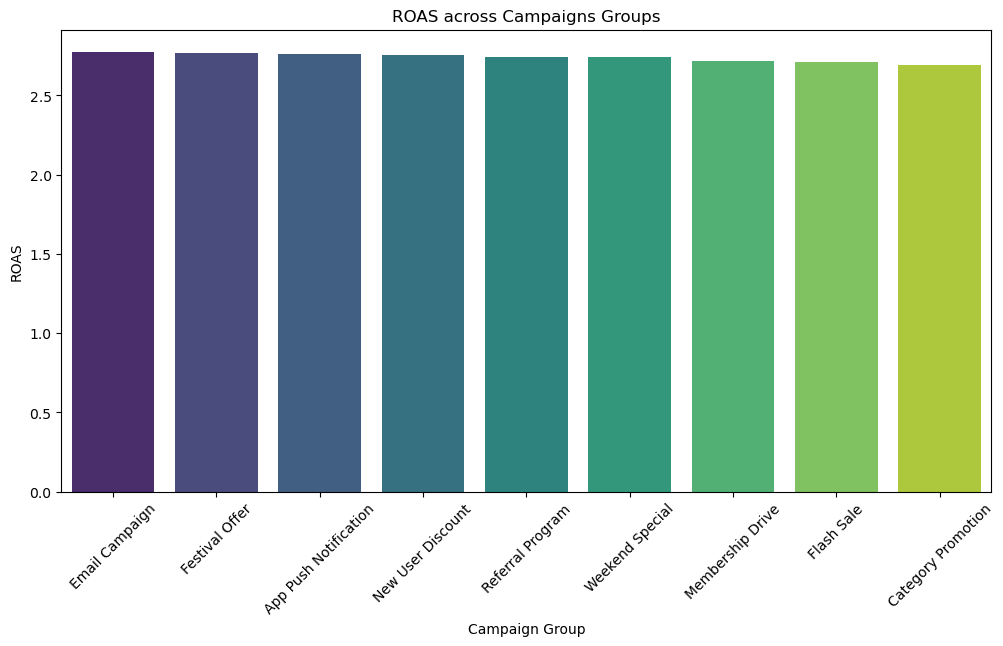

In [185]:
# visual for ROAS across campaign groups
plt.figure(figsize=(12, 6))
sns.barplot(x='campaign_name', y='roas', data=top_roas_campaigns, palette='viridis', legend=True,)

plt.title('ROAS across Campaigns Groups')
plt.xlabel('Campaign Group')
plt.ylabel('ROAS')
plt.tight_layout
plt.xticks(rotation=45);

### Channel Breakdown

In [165]:
# identifying the total spend for each marketing channel
spend_per_channel = mkt_df.groupby('channel')['spend_usd'].sum().sort_values(ascending=False)
print(spend_per_channel)

channel
App             50560.54500
Social Media    49324.36692
SMS             47983.29048
Email           47969.85648
Name: spend_usd, dtype: float64


In [174]:
# average ROAS across channels
roas_per_channel = mkt_df.groupby('channel')['roas'].mean().reset_index()
roas_per_channel = roas_per_channel.sort_values(by='roas', ascending=False)
print(roas_per_channel)

        channel      roas
0           App  2.754301
3  Social Media  2.749188
1         Email  2.748861
2           SMS  2.710112


/var/folders/yz/1gr6swr5703b66sbw24282z40000gn/T/ipykernel_67817/3763850581.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='channel', y='roas', data=roas_per_channel, palette='viridis')


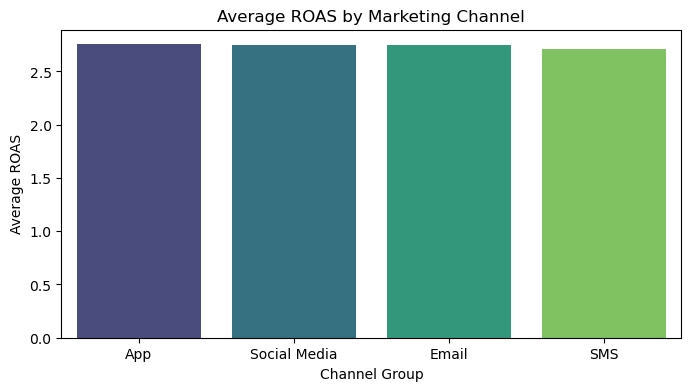

In [192]:
# create visual
plt.figure(figsize=(8, 4))
sns.barplot(x='channel', y='roas', data=roas_per_channel, palette='viridis')

plt.title("Average ROAS by Marketing Channel")
plt.xlabel("Channel Group")
plt.ylabel("Average ROAS");

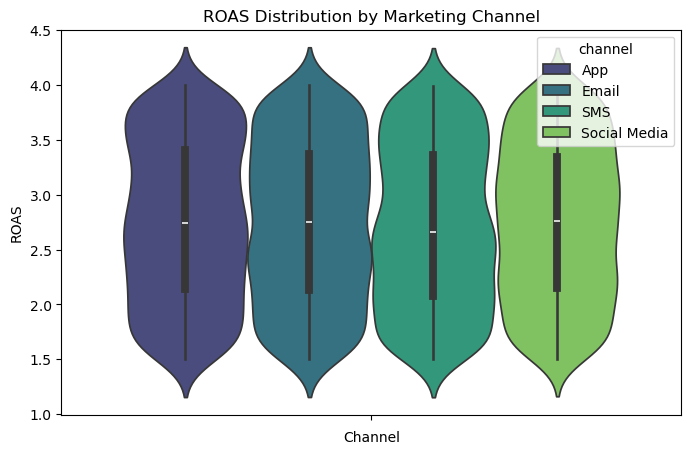

In [201]:
# violin plot shows the distribution and density of ROAS across different channels
plt.figure(figsize=(8, 5))
sns.violinplot(hue='channel', y='roas', data=mkt_df, palette='viridis')
plt.title("ROAS Distribution by Marketing Channel")
plt.xlabel("Channel")
plt.ylabel("ROAS");

# SP

In [202]:
# creating  new column that holds conversion rates
mkt_df['conversion_rate'] = mkt_df['conversions'] / mkt_df['clicks']

# getting the campaign that had the highest conversion rate
highest_conversion_rate_campaign = mkt_df.loc[mkt_df['conversion_rate'].idxmax(), ['campaign_name', 'conversion_rate', 'revenue_generated','channel', 'campaign_id']]
highest_conversion_rate_campaign

campaign_name        Festival Offer
conversion_rate                0.94
revenue_generated           3074.89
channel                Social Media
campaign_id                  236107
Name: 3440, dtype: object

In [199]:
# get average roas by channel
print(mkt_df['conversion_rate'].groupby('channel')['roas'].mean())
#print(roas_by_channel)

KeyError: 'channel'

Track performance fluctuations over time:

In [ ]:
daily_roas = mkt_df.groupby('date')['roas'].mean()

plt.figure(figsize=(15, 6))
daily_roas.plot(title="ROAS Over Time", marker='o', color='orange')
plt.xlabel("Date")
plt.ylabel("ROAS")
plt.grid(True)
plt.show()


In [ ]:
# how do these performance metrics correlate to overall roas?
correlation_matrix = mkt_df[['impressions', 'clicks', 'conversions', 'roas']].corr()
print(correlation_matrix)

In [ ]:
# calculating spend per ad channel
spend_by_channel = mkt_df.groupby('channel')['spend_usd'].sum().sort_values(ascending=False)
spend_by_channel

In [ ]:
# creating visual to show spend by channel
mkt_df.groupby('channel')['spend_usd'].sum().plot(kind='bar', title='Total Spend by Channel')
plt.ylabel('Total Spend ($)')
plt.show()

In [ ]:
# calculating how much is spent per target audience group
audience_spend= mkt_df.groupby('target_audience')['spend_usd'].sum().sort_values(ascending=False)
audience_spend

In [ ]:
#audience that generates the most revenue
revenue_by_audience = mkt_df.groupby('target_audience')['revenue_generated_usd'].sum().sort_values(ascending=False)
print(revenue_by_audience)

In [ ]:
#pie chart

In [ ]:
# calculating conversion rate by audience group
conversion_rate_by_audience = mkt_df.groupby('target_audience')['conversion_rate'].mean().sort_values(ascending=False)
print(conversion_rate_by_audience)

In [ ]:
# A box plot shows the spread and outliers in conversion rates for different audience segments:
plt.figure(figsize=(8, 5))
sns.boxplot(hue='target_audience', y='conversion_rate', data=mkt_df, palette='coolwarm')
plt.title("Conversion Rate by Target Audience")
plt.xlabel("Target Audience")
plt.ylabel("Conversion Rate")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# which channel has the highest engagement
mkt_df['engagement_rate'] = mkt_df['clicks'] / mkt_df['impressions']
highest_engagement_channel = mkt_df.groupby('channel')['engagement_rate'].mean().sort_values(ascending=False)
print(highest_engagement_channel)

In [ ]:
# calculating conversions by day
mkt_df['date'] = pd.to_datetime(mkt_df['date'])
mkt_df['day_of_week'] = mkt_df['date'].dt.day_name()

conversions_by_day = mkt_df.groupby('day_of_week')['conversions'].sum().sort_values(ascending=False)
print(conversions_by_day)

In [ ]:
mkt_df['day_of_week'] = mkt_df['date'].dt.day_name()
conversions_by_day = mkt_df.groupby('day_of_week')['conversions'].sum()

plt.figure(figsize=(8, 5))
conversions_by_day.reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]).plot(kind='bar', color='orange', edgecolor='black')
plt.title("Total Conversions by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Total Conversions")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# calculating engagement rate by day
mkt_df['date'] = pd.to_datetime(mkt_df['date'])
mkt_df['day_of_week'] = mkt_df['date'].dt.day_name()

conversions_by_day = mkt_df.groupby('day_of_week')['engagement_rate'].sum().sort_values(ascending=False)
print(conversions_by_day)

In [ ]:
# calculating revenue generated by day
mkt_df['date'] = pd.to_datetime(mkt_df['date'])
mkt_df['day_of_week'] = mkt_df['date'].dt.day_name()

conversions_by_day = mkt_df.groupby('day_of_week')['revenue_generated_usd'].sum().sort_values(ascending=False)
print(conversions_by_day)

In [ ]:
performance_by_day = mkt_df.groupby('day_of_week')[['roas', 'conversion_rate']].mean().sort_values(by='roas', ascending=False)
print(performance_by_day)

In [ ]:
plt.figure(figsize=(8, 5))
sns.heatmap(mkt_df[['impressions', 'clicks', 'conversions', 'spend', 'revenue_generated', 'roas']].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Key Metrics")
plt.show()

In [ ]:
# This helps identify which channel has the highest engagement in terms of clicks per impression:
mkt_df['ctr'] = mkt_df['clicks'] / mkt_df['impressions']  # calculate Click-Through Rate (CTR)

plt.figure(figsize=(8, 5))
sns.barplot(hue='channel', y='ctr', data=mkt_df, palette='muted', errorbar=None)
plt.title("Click-Through Rate (CTR) by Marketing Channel")
plt.xlabel("Channel")
plt.ylabel("CTR")
#plt.xticks(rotation=45)
plt.show()

In [ ]:
# A heatmap helps identify which target audience and channel combinations yield the best ROAS
plt.figure(figsize=(8, 5))
sns.heatmap(pivot, annot=True, cmap='Blues', linewidths=0.5)
plt.title("ROAS Heatmap by Channel and Target Audience")
plt.xlabel("Marketing Channel")
plt.ylabel("Target Audience")
plt.show()

In [ ]:
# This shows trends in conversions over time, helping to spot seasonal effects or spikes.
daily_conversions = mkt_df.groupby('date')['conversions'].sum().reset_index()

plt.figure(figsize=(16, 6))
sns.lineplot(x='date', y='conversions', data=daily_conversions, marker='o', color='green')
plt.title("Conversions Over Time")
plt.xlabel("Date")
plt.ylabel("Total Conversions")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# A kernel density estimate (KDE) plot helps visualize the distribution of revenue:
plt.figure(figsize=(8, 5))
sns.kdeplot(mkt_df['revenue_generated_usd'], fill=True, color='green')
plt.title("Revenue Distribution")
plt.xlabel("Revenue Generated")
plt.ylabel("Density")
plt.show()

Check if high clicks lead to conversions:

In [ ]:
correlation = np.corrcoef(mkt_df['clicks'], mkt_df['conversions'])[0, 1]
print(f"Correlation between Clicks and Conversions: {correlation:.2f}")

In [ ]:
sns.scatterplot(x='spend', y='roas', data=mkt_df, alpha=0.6)
plt.title("ROAS vs. Spend")
plt.xlabel("Spend")
plt.ylabel("ROAS")
plt.grid(True)
plt.show()

Identify drop-off points in the marketing funnel.

In [ ]:
mkt_df['impression_to_click'] = mkt_df['clicks'] / mkt_df['impressions']
mkt_df['click_to_conversion'] = mkt_df['conversions'] / mkt_df['clicks']

print(mkt_df[['channel', 'impression_to_click', 'click_to_conversion']].groupby('channel').mean())


In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='spend', y='revenue_generated', data=mkt_df, alpha=0.6)
sns.regplot(x='spend', y='revenue_generated', data=mkt_df, scatter=False, color='red')
plt.title("Marketing Spend vs. Revenue Generated")
plt.xlabel("Marketing Spend ($)")
plt.ylabel("Revenue Generated ($)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

Which campaigns have the most efficient budget allocation:

In [ ]:
mkt_df['spend_to_revenue_ratio'] = mkt_df['spend'] / mkt_df['revenue_generated']

plt.figure(figsize=(10, 5))
sns.barplot(x='campaign_name', y='spend_to_revenue_ratio', data=mkt_df.sort_values(by='spend_to_revenue_ratio'), palette='coolwarm')
plt.title("Spend-to-Revenue Ratio by Campaign")
plt.xlabel("Campaign")
plt.ylabel("Spend-to-Revenue Ratio")
plt.xticks(rotation=45)
plt.show()

In [ ]:
#move this visual up

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='channel', y='roas', data=mkt_df, palette='pastel')
plt.title("ROAS Distribution by Marketing Channel")
plt.xlabel("Marketing Channel")
plt.ylabel("ROAS")
plt.xticks(rotation=45)
plt.show()

Shows whether higher budget allocation leads to higher conversions:

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x='channel', y='spend', data=mkt_df, color='blue', label='Spend')
sns.barplot(x='channel', y='conversions', data=mkt_df, color='orange', label='Conversions')
plt.title("Marketing Budget Allocation vs. Conversions")
plt.xlabel("Marketing Channel")
plt.ylabel("Amount")
plt.xticks(rotation=45)
plt.legend()
plt.show()

## File 5: Blinkit Inventory- likely to OMIT **NOTE -NEW version, or og version**

In [ ]:
df5 = pd.read_csv('/Users/tovi/Documents/blinkit_inventoryNew.csv')
df5

In [ ]:
df5.info()

In [ ]:
df5.shape

In [ ]:
df5.isnull()

In [ ]:
df5['date'] = pd.to_datetime(inventory_df['date'], format="%d-%m-%Y")

# Group by date and sum stock received
daily_stock = inventory_df.groupby('date')['stock_received'].sum()

# Plot the trend
plt.figure(figsize=(12, 6))
sns.lineplot(x=daily_stock.index, y=daily_stock.values)
plt.xlabel("Date")
plt.ylabel("Total Stock Received")
plt.title("Total Stock Received Over Time")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Extract month and weekday
df5['month'] = df5['date'].dt.month
df5['weekday'] = df5['date'].dt.day_name()

# Monthly trend
plt.figure(figsize=(10, 5))
sns.boxplot(x=inventory_df['month'], y=inventory_df['stock_received'])
plt.xlabel("Month")
plt.ylabel("Stock Received")
plt.title("Monthly Stock Received Distribution")
plt.show()

# Weekly trend
plt.figure(figsize=(10, 5))
sns.boxplot(x=inventory_df['weekday'], y=inventory_df['stock_received'], order=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.xlabel("Weekday")
plt.ylabel("Stock Received")
plt.title("Stock Received by Day of the Week")
plt.show()

In [ ]:
# Total stock received per product
product_stock = df5.groupby('product_id')['stock_received'].sum()

# Top 10 products with highest stock received
top_products = product_stock.nlargest(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.index, y=top_products.values)
plt.xlabel("Product ID")
plt.ylabel("Total Stock Received")
plt.title("Top 10 Products with Highest Stock Received")
plt.xticks(rotation=45)
plt.show()


In [ ]:
# What is the average stock received per product?

# Calculate mean stock received per product
avg_stock_per_product = df5.groupby('product_id')['stock_received'].mean()

# Plot distribution
plt.figure(figsize=(10, 5))
sns.histplot(avg_stock_per_product, bins=50, kde=True)
plt.xlabel("Average Stock Received per Product")
plt.ylabel("Frequency")
plt.title("Distribution of Average Stock Received per Product")
plt.show()

In [ ]:
avg_stock_per_product

In [ ]:
#What percentage of received stock is damaged on average?

# Calculate total stock and damaged stock
total_stock = df5['stock_received'].sum()
total_damaged = df5['damaged_stock'].sum()

# Calculate percentage
damage_percentage = (total_damaged / total_stock) * 100
print(f"Average percentage of damaged stock: {damage_percentage:.2f}%")

In [ ]:
#are there certain products that consistently have higher damage rates?

# Calculate damage rate per product
df5['damage_rate'] = df5['damaged_stock'] / inventory_df['stock_received']
product_damage = df5.groupby('product_id')['damage_rate'].mean()

# Top 10 products with highest damage rate
top_damaged_products = product_damage.nlargest(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_damaged_products.index, y=top_damaged_products.values)
plt.xlabel("Product ID")
plt.ylabel("Average Damage Rate")
plt.title("Top 10 Products with Highest Damage Rate")
plt.xticks(rotation=45)
plt.show()


In [ ]:
df5['damage_rate'].nlargest(10)

In [ ]:
# how does damage rate change over time

# Calculate daily damage rate
daily_damage_rate = (df5.groupby('date')['damaged_stock'].sum() /
                     df5.groupby('date')['stock_received'].sum()) * 100

# Plot trend
plt.figure(figsize=(12, 6))
sns.lineplot(x=daily_damage_rate.index, y=daily_damage_rate.values)
plt.xlabel("Date")
plt.ylabel("Daily Damage Rate (%)")
plt.title("Daily Damage Rate Over Time")
plt.xticks(rotation=45)
plt.show()

### File 7: Blinkit Delivery Times: **NOTE maybe to be excluded- order_df shows delivery times and stats, only one unique value for reasons_if_delayed which is traffic.**

In [ ]:
df7 = pd.read_csv('/Users/tovi/Documents/blinkit_delivery_performance.csv')
df7

In [ ]:
df7['reasons_if_delayed'].nunique()

### File 8: Blinkit Customers

In [ ]:
cust_df = pd.read_csv('/Users/tovi/Documents/blinkit_customers.csv')
cust_df

In [ ]:
#only keep desired columns
columns=['customer_id', 'area', 'registration_date', 'customer_segment', 'total_orders', 'avg_order_value']


In [ ]:
# Convert registration_date to datetime
cust_df['registration_date'] = pd.to_datetime(cust_df['registration_date'])

In [ ]:
# 1. Distribution of customers across different segments
plt.figure(figsize=(8, 5))
sns.countplot(x=cust_df['customer_segment'], palette='viridis')
plt.title("Customer Distribution by Segment")
plt.xlabel("Customer Segment")
plt.ylabel("Count")
plt.show()

In [ ]:
# 2. Average total orders per customer segment
avg_orders = cust_df.groupby('customer_segment')['total_orders'].mean().sort_values()
print("Average Total Orders per Customer Segment:\n", avg_orders)


In [ ]:
# 3. Average order value across customer segments
avg_order_value = cust_df.groupby('customer_segment')['avg_order_value'].mean()
print("Average Order Value per Customer Segment:\n", avg_order_value)

In [ ]:
# 4. Percentage of customers with fewer than 5 orders
low_order_percentage = (cust_df[cust_df['total_orders'] < 5].shape[0] / cust_df.shape[0]) * 100
print(f"Percentage of customers with fewer than 5 orders: {low_order_percentage:.2f}%")

In [ ]:
# 5. Total revenue generated by each customer segment
cust_df['total_revenue'] = cust_df['total_orders'] * cust_df['avg_order_value']
total_revenue = cust_df.groupby('customer_segment')['total_revenue'].sum()
print("Total Revenue by Customer Segment:\n", total_revenue)

In [ ]:
# 6. Correlation between total orders and average order value
correlation = cust_df[['total_orders', 'avg_order_value']].corr()
print("Correlation between Total Orders and Average Order Value:\n", correlation)
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# 7. Highest and lowest average order values
max_order_value = cust_df['avg_order_value'].max()
min_order_value = cust_df['avg_order_value'].min()
print(f"Highest Average Order Value: {max_order_value}")
print(f"Lowest Average Order Value: {min_order_value}")


In [ ]:
# 8. Area with the highest number of registered customers
top_area = cust_df['area'].value_counts().idxmax()
print(f"Area with the most customers: {top_area}")

In [ ]:
# 8. Area with the lowest number of registered customers
top_area = cust_df['area'].value_counts().idxmin()
print(f"Area with the fewest customers: {top_area}")

In [ ]:
# 9. Average order value per area
area_avg_order_value = cust_df.groupby('area')['avg_order_value'].mean()
print("Average Order Value per Area:\n", area_avg_order_value)

## get max of this value as well

In [ ]:
# 10. Areas with the highest percentage of Premium customers
premium_distribution = cust_df[cust_df['customer_segment'] == 'Premium']['area'].value_counts()
print("Areas with highest Premium customer count:\n", premium_distribution.head())

In [ ]:
# 11. Monthly customer registrations
cust_df['registration_month'] = cust_df['registration_date'].dt.to_period("M")
monthly_registrations = cust_df['registration_month'].value_counts().sort_index()
monthly_registrations.plot(kind='line', marker='o', figsize=(10, 5))
plt.title("Monthly Customer Registrations")
plt.xlabel("Month")
plt.ylabel("Number of Registrations")
plt.show()

In [ ]:
# 12. Trend of new customer registrations over time
sns.histplot(cust_df['registration_date'], bins=20, kde=True)
plt.title("New Customer Registrations Over Time")
plt.xlabel("Date")
plt.ylabel("Count")
plt.show()

In [ ]:
# 13. Recent customer segment distribution (last 3 months)
recent_customers = cust_df[cust_df['registration_date'] >= cust_df['registration_date'].max() - pd.DateOffset(months=3)]
sns.countplot(x=recent_customers['customer_segment'], palette='coolwarm', legend=False)
plt.title("Customer Segments for Recent Registrations")
plt.show()

In [ ]:
# 13. Recent customer segment distribution (last 6 months)
recent_customers = cust_df[cust_df['registration_date'] >= cust_df['registration_date'].max() - pd.DateOffset(months=6)]
sns.countplot(x=recent_customers['customer_segment'], palette='coolwarm', legend=False)
plt.title("Customer Segments for Recent Registrations")
plt.show()

### File 9: Blinkit Customer Feedback

In [ ]:
feedback_df = pd.read_csv('/Users/tovi/Documents/blinkit_customer_feedback.csv')
feedback_df

Overall Rating Distribution:

In [ ]:
feedback_df['rating'].plot(kind='hist', bins=5, edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Customer Ratings')
plt.show()

Sentiment Distribution

In [ ]:
# Count occurrences of each sentiment
sentiment_counts = feedback_df['sentiment'].value_counts()

# Plot sentiment distribution
sentiment_counts.plot(kind='bar', color=['green', 'gray', 'red'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Customer Feedback Sentiment Distribution')
plt.show()

Average Rating per Feedback Category:

In [ ]:
category_avg_rating = feedback_df.groupby('feedback_category')['rating'].mean().sort_values()

# Plot category vs. average rating
category_avg_rating.plot(kind='bar', color='skyblue')
plt.xlabel('Feedback Category')
plt.ylabel('Average Rating')
plt.title('Average Rating per Feedback Category')
plt.xticks(rotation=45)
plt.show()

In [ ]:
feedback_df['feedback_date'] = pd.to_datetime(feedback_df['feedback_date'])

# Count sentiment over time
sentiment_trend = feedback_df.groupby(feedback_df['feedback_date'].dt.to_period('M'))['sentiment'].value_counts().unstack()

# Plot sentiment trend
sentiment_trend.plot(kind='line', marker='o')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Sentiment Trends Over Time')
plt.legend(title='Sentiment')
plt.show()

In [ ]:
from collections import Counter
import re

# Combine all negative feedback
negative_feedback = ' '.join(feedback_df[feedback_df['sentiment'] == 'Negative']['feedback_text'])

# Tokenize and count words
words = re.findall(r'\b\w+\b', negative_feedback.lower())
word_counts = Counter(words)

# Get 10 most common words
common_words = word_counts.most_common(20)
print(common_words)

**TO DO**
- create separate doc for analysis w SQL documentation
- upload CSVs to pgadmin
- select files for PYTHON EDA, NOT SQL, reduce it, upload, view, and choose- explain in beginning why certain python files were left out of the python analysis
- should anything be combined?
- choose top 2-3 files for matplot and numpy demo
- Tableau dashboard

## Exploratory 